In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('ihdp.csv')

In [ ]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [ ]:
df=data.copy()

In [ ]:
data.shape

(747, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

In [ ]:
features = data.loc[:, data.columns != 'yf']
target= data['yf'] 

# 3(b)

In [ ]:
#Splitting the dataset into training(70%), validation(20%) and testing(10%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth= 10,random_state=0,) 
# training the model
reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

# 3(c)

In [ ]:
from sklearn.metrics import mean_squared_error
prediction = reg.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.8433565645230936
0.918344469424787


In [ ]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

from sklearn.model_selection import GridSearchCV
reg_new = GridSearchCV(reg, grid, cv=10, n_jobs=-1)
reg_new.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=10, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [ ]:
reg_new.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [ ]:
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [ ]:
# Predict on test data
prediction = rf.predict(X_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print(mse)

rmse = mse**.5
print(rmse)

0.7395731719515659
0.8599844021559728


# 3(f)

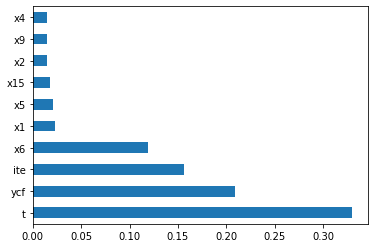

<Figure size 432x288 with 0 Axes>

In [ ]:
feature_importance=pd.Series(rf.feature_importances_,index=features.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()
plt.savefig('feature_importance_jobs.png')

# 4(a)

In [ ]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [ ]:
TREATMENT = 't'
OUTCOME = 'yf'
data.groupby(TREATMENT)[OUTCOME].describe()

,count,mean,std,min,25%,50%,75%,max
t,,,,,,,,
0.0,608.0,2.411297,1.595977,-1.543902,1.449381,2.223557,3.082210,11.268228
1.0,139.0,6.432418,1.108928,3.287666,5.834726,6.307376,7.335885,9.314615


In [ ]:
!pip install causalinference

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
from causalinference import CausalModel

In [ ]:

t = data[TREATMENT]
X = pd.get_dummies(data.drop(columns=[OUTCOME, TREATMENT]))
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', LogisticRegression(C=1e6))
])
pipe.fit(X, t)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression(C=1000000.0))])

In [ ]:
predictions = pipe.predict_proba(X)
predictions_binary = pipe.predict(X)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

print('Accuracy: {:.4f}\n'.format(accuracy_score(t, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(confusion_matrix(t, predictions_binary)))
print('F1 score is: {:.4f}'.format(f1_score(t, predictions_binary)))

Accuracy: 0.9880

Confusion matrix:
[[602   6]
 [  3 136]]

F1 score is: 0.9680


# 4(b)

In [ ]:
import math

def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value


predictions_logit = np.array([logit(xi) for xi in predictions[:,1]])


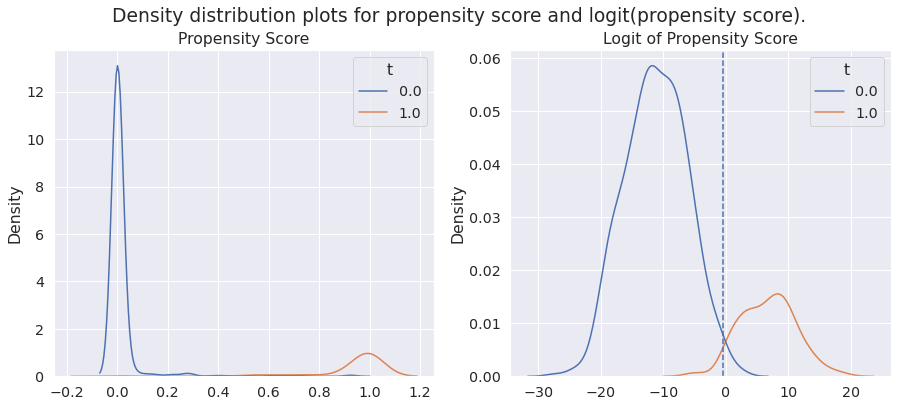

In [ ]:
sns.set(rc={'figure.figsize':(15,6)}, font_scale=1.3)
fig, ax = plt.subplots(1,2)
fig.suptitle('Density distribution plots for propensity score and logit(propensity score).')
sns.kdeplot(x = predictions[:,1], hue = t , ax = ax[0])
ax[0].set_title('Propensity Score')
sns.kdeplot(x = predictions_logit, hue = t , ax = ax[1])
ax[1].axvline(-0.4, ls='--')
ax[1].set_title('Logit of Propensity Score')
plt.show()

In [ ]:
common_support = (predictions_logit > -10) & (predictions_logit < 10)


In [ ]:
data.loc[:,'propensity_score'] = predictions[:,1]
data.loc[:,'propensity_score_logit'] = predictions_logit
data.loc[:,'outcome'] = target

X.loc[:,'propensity_score'] = predictions[:,1]
X.loc[:,'propensity_score_logit'] = predictions_logit
X.loc[:,'outcome'] = target
X.loc[:,'treatment'] = data.t

In [ ]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x23,x24,x25,t,yf,ycf,ite,propensity_score,propensity_score_logit,outcome
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928,0.999997,12.765907,4.771232
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604,0.034572,-3.329532,2.956273
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195,0.000083,-9.399404,4.164164
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505,0.999260,7.208792,6.172307
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591,0.998032,6.228637,7.834469


In [ ]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,ycf,ite,propensity_score,propensity_score_logit,outcome,treatment
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.298509,4.657928,0.999997,12.765907,4.771232,1.0
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,5.783770,3.428604,0.034572,-3.329532,2.956273,0.0
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,7.055789,3.658195,0.000083,-9.399404,4.164164,0.0
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.379697,4.585505,0.999260,7.208792,6.172307,1.0
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.747986,4.265591,0.998032,6.228637,7.834469,1.0


In [ ]:
weight_t = 1/data.query("t==1")["propensity_score"]
weight_nt = 1/(1-data.query("t==0")["propensity_score"])
print("Original Sample Size", data.shape[0])
print("Treated Population Sample Size", sum(weight_t))
print("Untreated Population Sample Size", sum(weight_nt))

Original Sample Size 747
Treated Population Sample Size 433.24782416275934
Untreated Population Sample Size 646.880729659241


In [ ]:
weight = ((data["t"]-data["propensity_score"]) /
          (data["propensity_score"]*(1-data["propensity_score"])))

y1 = sum(data.query("t==1")["yf"]*weight_t) / len(data)
y0 = sum(data.query("t==0")["yf"]*weight_nt) / len(data)

ate = np.mean(weight * data["yf"])

print("Y1:", y1)
print("Y0:", y0)
print("ATE", np.mean(weight * data["yf"]))

Y1: 4.292500662110738
Y0: 2.1651070068849556
ATE 2.1273936552257826


# 4(c)

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold


In [ ]:

# define model
lg2 = RandomForestRegressor(min_weight_fraction_leaf=0.1)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
# Predict on test data
prediction = lg2.predict(X_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print(mse)

rmse = mse**.5
print(rmse)

0.96763950389801
0.9836866899058917


In [ ]:
# define weight hyperparameter
w = [0.1,0.2,0.3,0.4,0.5 ]
hyperparam_grid = {"min_weight_fraction_leaf": w }

In [ ]:
# define model
lg3 = RandomForestRegressor(min_weight_fraction_leaf=0.1)
# define evaluation procedure
grid = GridSearchCV(lg3, hyperparam_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(min_weight_fraction_leaf=0.1),
             n_jobs=-1,
             param_grid={'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
grid.best_params_

{'min_weight_fraction_leaf': 0.1}

In [ ]:
# define model
lg3 = RandomForestRegressor(random_state=42,min_weight_fraction_leaf=0.1)
# fit it
lg3.fit(X_train,y_train)
# test
y_pred = lg3.predict(X_test)
# performance

# Predict on test data
prediction = lg3.predict(X_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print(mse)

rmse = mse**.5
print(rmse)


0.9725956472942363
0.9862026400766915


# 5(a,b,c)

In [ ]:
!pip install dowhy

In [ ]:
from dowhy import CausalModel
from IPython.display import Image, display

In [ ]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 't', 'yf', 'ycf', 'ite'],
      dtype='object')

In [ ]:
df.dtypes

x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
t      float64
yf     float64
ycf    float64
ite    float64
dtype: object

In [ ]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 't', 'yf', 'ycf', 'ite'],
      dtype='object')

In [ ]:
treatment = 't'
outcome = 'yf'

features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25']


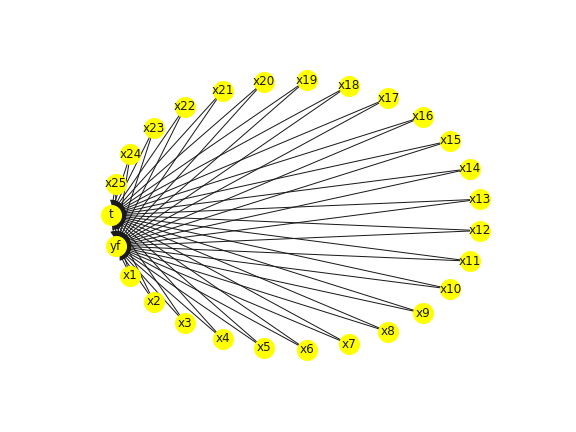

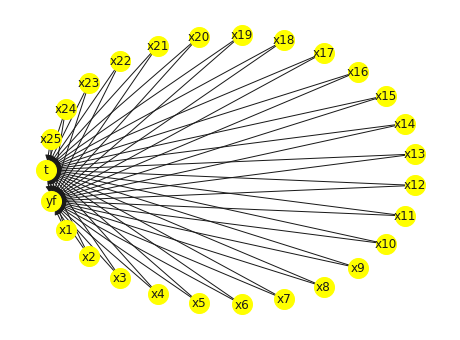

In [ ]:
model = CausalModel(
    data=df,
    treatment=treatment, 
    outcome=outcome, 
    common_causes=features, 
    instruments=None, 
    effect_modifiers=None)

model.view_model()
display(Image(filename="causal_model.png"))

In [ ]:

# split data into train and test sets 
train, test = train_test_split(df, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=features, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[features]
W = None
X_test = test[features]

In [ ]:
!pip install econml

     |████████████████████████████████| 3.3 MB 5.5 MB/s 
     |████████████████████████████████| 356 kB 52.1 MB/s 
     |████████████████████████████████| 123 kB 63.3 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491678 sha256=499aaaaf51362c2930ec3f3ded8225ebd7bb9f1131008748793c7bfc16e423df
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: dowhy
    Found existing installation: dowhy 0.7.1
    Uninstalling dowhy-0.7.1:
      Successfully uninstalled dowhy-0.7.1


In [ ]:
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV

# set parameters for causal forest 
causal_forest = CausalForestDML(criterion='het', 
                                n_estimators=10000,       
                                min_samples_leaf=10, 
                                max_depth=None, 
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=LassoCV(), 
                                model_y=LassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest.const_marginal_ate(X_test)

In [ ]:
effects_train = causal_forest.effect(X)
effects_test = causal_forest.effect(X_test)
conf_intrvl = causal_forest.effect_interval(X_test)

In [ ]:
effects_train

array([4.13845531, 4.3720357 , 3.84020982, 4.07260306, 4.05214781,
       4.1694236 , 4.10073229, 4.13306444, 4.09490069, 4.23119854,
       4.21376825, 4.1528801 , 2.90763736, 4.25548364, 2.37423709,
       4.51091129, 4.47032835, 3.42356154, 4.26446666, 4.30491054,
       4.33974771, 4.13310636, 4.09004747, 4.3242547 , 4.06655222,
       4.36576022, 4.18755609, 2.50485999, 3.91276983, 2.47105735,
       4.27317242, 4.45109529, 4.30269084, 3.2896977 , 4.12640389,
       2.46682443, 4.08987687, 4.34564833, 4.12846075, 4.18306841,
       4.19624022, 4.19044247, 4.18401207, 2.85469286, 4.29121016,
       4.52869973, 4.27394402, 4.1440754 , 4.4908311 , 4.10406324,
       4.27587722, 4.21069801, 4.26961086, 4.32125321, 4.22727899,
       4.3422437 , 2.75680761, 4.32279349, 4.17738176, 4.29128065,
       4.16162608, 4.16373418, 4.10623927, 2.59917925, 4.34997061,
       4.25914432, 4.24382159, 3.77594128, 4.11357414, 4.15336368,
       4.14781502, 2.54331696, 4.49403261, 3.85492154, 3.94205

In [ ]:
type(effects_test)

numpy.ndarray

In [ ]:
series

0      3.748490
1      3.803899
2      4.264542
3      3.383744
4      2.436759
         ...   
145    4.282576
146    4.162217
147    4.187459
148    4.448937
149    4.189584
Length: 150, dtype: float64

In [ ]:

true_pred=pd.Series(test.yf)

In [ ]:
true_pred=true_pred.to_numpy(dtype ='float32')

In [ ]:
conf_intrvl

(array([3.1144485 , 3.27549138, 3.9019577 , 2.65212488, 1.63483499,
        3.75292892, 2.12914242, 4.08899658, 2.72519112, 3.78563683,
        3.93764239, 3.8338941 , 3.43886066, 1.77539771, 2.16251853,
        3.96402214, 3.90583424, 3.19961915, 3.85256118, 3.83859631,
        4.01884222, 1.68653866, 3.2852666 , 3.9934628 , 4.00342805,
        3.20587702, 3.57679816, 3.82492895, 3.80188056, 3.86300387,
        3.81969941, 3.59593438, 3.90074544, 3.58019221, 2.03982746,
        3.8174321 , 4.11920591, 1.61733301, 3.74990941, 3.78029746,
        3.66325414, 3.66187683, 4.06661397, 3.37933703, 3.84993259,
        3.76672999, 3.26136008, 3.9391745 , 3.98764582, 3.92704941,
        3.82751037, 3.75590011, 1.75526655, 1.79434999, 1.67138799,
        3.97590825, 3.65094237, 4.0201032 , 3.90991299, 3.76503479,
        3.87929667, 3.72502223, 1.63336885, 1.76564394, 3.92240654,
        3.27493847, 4.00909278, 3.31131803, 3.85691124, 1.7873165 ,
        3.19301509, 3.70337837, 1.66928569, 4.03